In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [13]:
data = pd.read_csv("../credit+approval/crx.data", header=None)
column_names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
data.columns = column_names

# Визначення цільової змінної
target_column = data.columns[-1]

In [14]:
print(data.head())
print(data.info())

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   +
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     

In [15]:
# Заміна '?' на NaN
data = data.replace('?', np.nan)

# Розділення на числові та категоріальні змінні
numeric_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(exclude=[np.number]).columns.drop(target_column)

# Заповнення пропущених значень
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].mean())

# Кодування категоріальних змінних
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column].astype(str))

# Перетворення всіх даних у числовий формат
data = data.apply(pd.to_numeric, errors='coerce')

# Видалення рядків з NaN значеннями, якщо такі залишились
data = data.dropna()
# Розділення на ознаки та цільову змінну
X = data.drop(target_column, axis=1)
y = data[target_column]

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

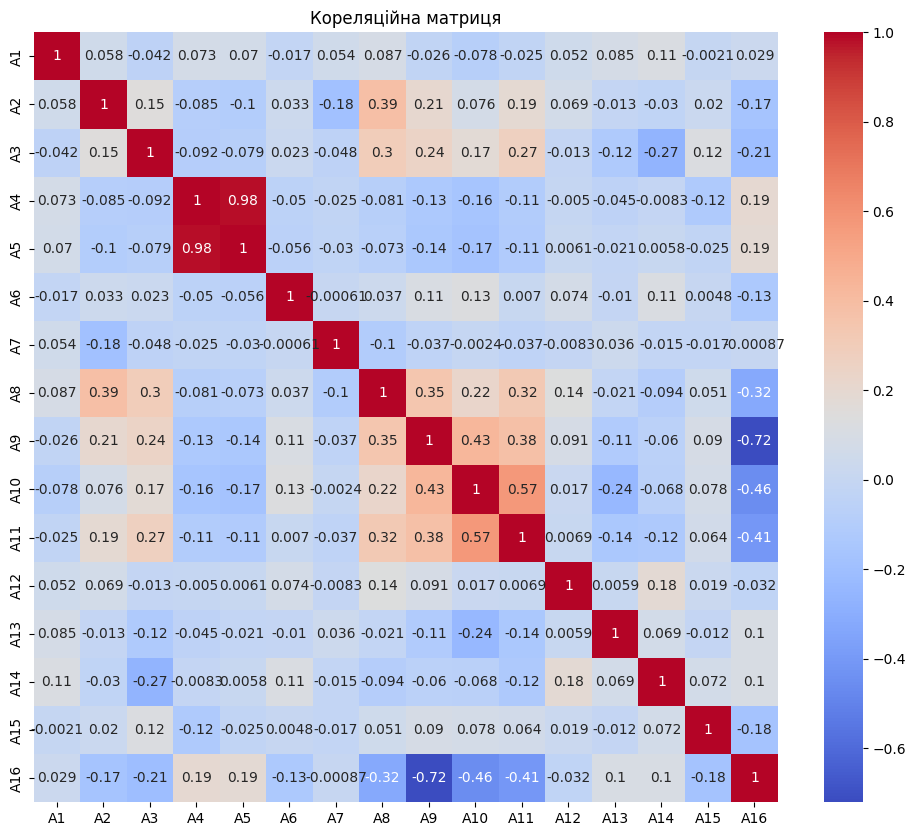

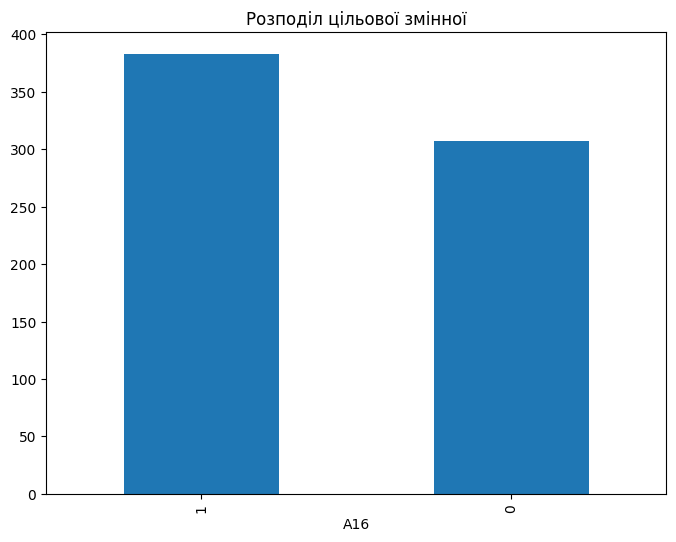

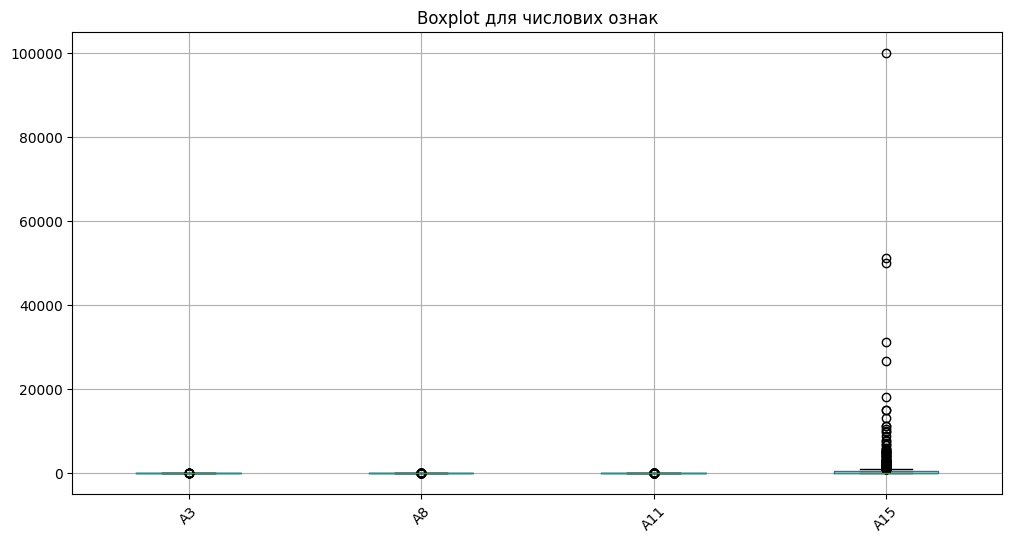

In [16]:
# Кореляційна матриця
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

# Розподіл цільової змінної
plt.figure(figsize=(8, 6))
data[target_column].value_counts().plot(kind='bar')
plt.title('Розподіл цільової змінної')
plt.show()

# Boxplot для числових ознак
plt.figure(figsize=(12, 6))
data[numeric_features].boxplot()
plt.title('Boxplot для числових ознак')
plt.xticks(rotation=45)
plt.show()

In [17]:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
dt_pred = dt_clf.predict(X_test_scaled)
print("DecisionTreeClassifier Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# LogisticRegression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train_scaled, y_train)
lr_pred = lr_clf.predict(X_test_scaled)
print("LogisticRegression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Метрична модель (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
print("KNeighborsClassifier Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

DecisionTreeClassifier Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        70
           1       0.76      0.78      0.77        68

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138

LogisticRegression Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        70
           1       0.84      0.85      0.85        68

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

KNeighborsClassifier Accuracy: 0.855072463768116
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        70
           1       0.81      0.93      0.86        68

    accuracy                     

In [19]:
# Функція для безпечного ділення
def safe_divide(a, b, fill_value=0):
    return np.divide(a, b, out=np.full_like(a, fill_value), where=b!=0)

# Створення нових ознак
data['A2_A3_ratio'] = np.where(data['A3'] != 0, data['A2'] / data['A3'], 0)
data['A8_A9_sum'] = data['A8'] + data['A9']
data['A10_A12_diff'] = data['A12'] - data['A10']

# Заміна нескінченних значень на NaN і заповнення їх медіаною
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.median())

# Розділення на ознаки та цільову змінну
X = data.drop(target_column, axis=1)
y = data[target_column]

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Створення моделей
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42, max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Список моделей
models = [
    ("Decision Tree", dt_clf),
    ("Logistic Regression", lr_clf),
    ("K-Nearest Neighbors", knn_clf)
]

# Навчання та оцінка моделей
for name, model in models:
    # Навчання моделі
    model.fit(X_train_scaled, y_train)
    
    # Прогнозування
    y_pred = model.predict(X_test_scaled)
    
    # Оцінка точності
    accuracy = accuracy_score(y_test, y_pred)
    
    # Крос-валідація
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Порівняння важливості ознак для Decision Tree
if isinstance(dt_clf, DecisionTreeClassifier):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': dt_clf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 important features for Decision Tree:")
    print(feature_importance.head(10))

# Порівняння коефіцієнтів для Logistic Regression
if isinstance(lr_clf, LogisticRegression):
    coef = pd.DataFrame({
        'feature': X.columns,
        'coef': lr_clf.coef_[0]
    }).sort_values('coef', key=abs, ascending=False)
    
    print("\nTop 10 important features for Logistic Regression:")
    print(coef.head(10))


Decision Tree:
Accuracy: 0.7754
Cross-validation score: 0.7952 (+/- 0.0304)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        70
           1       0.76      0.79      0.78        68

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138


Logistic Regression:
Accuracy: 0.8478
Cross-validation score: 0.8659 (+/- 0.0146)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        70
           1       0.84      0.85      0.85        68

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138


K-Nearest Neighbors:
Accuracy: 0.8478
Cross-validation score: 0.8298 (+/- 0.0441)

Classification Report:
              precision    reca